# Haberman's Survival Dataset

REFERENCE : https://archive.ics.uci.edu/ml/datasets/haberman's+survival

Kaggle Link of the Dataset : https://www.kaggle.com/gilsousa/habermans-survival-data-set/version/1

Information:
1) Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer.
    
2) The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings   Hospital on the survival of patients who had undergone surgery for breast cancer.

Attributes:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)

   i) 1 = the patient survived 5 years or longer

   ii) 2 = the patient died within 5 year

In [1]:
#INSTALLING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#LOADING THE DATASET IN DATAFRAME
data=pd.read_csv('haberman.csv')

In [3]:
#SHAPE OF THE DATASET
data.shape

(306, 4)

In [4]:
#GETTING INFORMATION ON ATTRIBUTES OF THE DATASET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB



OBSERVATION

1) 306 rows and 4 coloumns of data are there in this dataset.

2) The data type for every coloumn is integer.

3) The non-null count for every coloumn is 306 that means there are no missing values.

4) Here nodes are refered as positive axilary nodes.

5) Positive axilary nodes means that the cancer has spread from the original breast tumor
(REFERENCE: https://www.mybreastcancertreatment.org/en-US/PersonalizeYourTreatment/Understanding-Node-Positive-Breast-Cancer)

In [5]:
print(data.head())
data['status'].value_counts()

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


1    225
2     81
Name: status, dtype: int64

OBSERVATION:

1) 225 patients who had undergone surgery for breast cancer have survived 5 years or longer.

2) 81 patients who had undergone surgery for breast cancer have survived less than 5 years.

In [6]:
#seperating class attributes
status_1 = data.loc[data["status"] == 1];
status_2 = data.loc[data["status"] == 2];

In [7]:
# STATISTICAL INFORMATION OF THE HABERMAN'S CANVER SURVIVAL DATA
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


OBSERVATION:

1) The patients who had undergone surgery for breast cancer are in the age interval of 30 t0 83

2) The dataset contains cases from a study that was conducted between year 1958 and 1969.

3) The minimum and maximum number of positive axilary nodes are 0 and 52 respectively.


In [8]:
print("Means:")
print('status_1 : ',np.mean(status_1["nodes"]))
print('status_2 : ',np.mean(status_2["nodes"]))

print("\nStd-dev:");
print('status_1 : ',np.std(status_1["nodes"]))
print('status_2 : ',np.std(status_2["nodes"]))

print("\nQuantiles:")
print('status_1 : ',np.percentile(status_1["nodes"],np.arange(0, 100, 25)))
print('status_2 : ',np.percentile(status_2["nodes"],np.arange(0, 100, 25)))

Means:
status_1 :  2.7911111111111113
status_2 :  7.45679012345679

Std-dev:
status_1 :  5.857258449412131
status_2 :  9.128776076761632

Quantiles:
status_1 :  [0. 0. 0. 3.]
status_2 :  [ 0.  1.  4. 11.]


OBSERVATIONS:

1) The mean positive axilary nodes of patients who survived more than 5 years is 3.

2) The mean positive axilary nodes of patients who survived less than 5 years is 7.

3) The spread of patients survived less than 5 years is greater than patients survived more than 5 years. Therefore the density of status_1 is more and patients survived more than 5 years are more in this dataset.

4) 50th percentile of positive axilary nodes is 0 and 75th percentile of positve axilary nodes are more than 3 in status_1.

5) 50th percentile of positive axilary nodes is 4 and 75th percentile of positve axilary nodes are more than 11 in status_2.


# Univariate analysis

[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


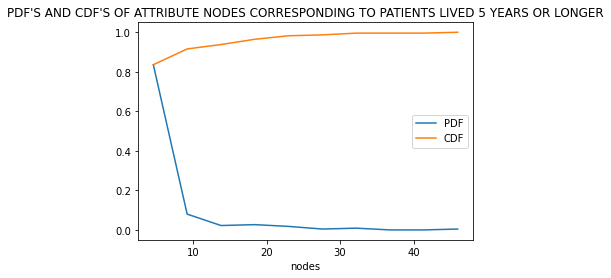

In [9]:
#PLOTTING PDF'S AND CDF'S OF ATTRIBUTE NODES CORRESPONDING TO PATIENTS LIVED 5 YEARS OR LONGER
counts, bin_edges = np.histogram(status_1['nodes'], bins=10, 
                                 density=True)
#Compute PDF
print(counts)
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
print(bin_edges[1:])
plt.xlabel('nodes')
plt.title("PDF'S AND CDF'S OF ATTRIBUTE NODES CORRESPONDING TO PATIENTS LIVED 5 YEARS OR LONGER")
plt.legend()
plt.show();

OBSERVATION:

1) AROUND 90% OF PEOPLE HAVE SURVIVED MORE THAN 5 YEARS, IF THEY HAVE LESS THAN 10 POSITIVE AXILARY NODES

2) THE LESSER THE POSITIVE AXILARY NODES, THE MORE CHANCE IS THERE TO SURVIVE.



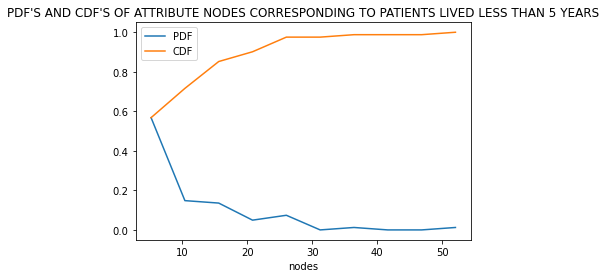

In [10]:
#PLOTTING PDF'S AND CDF'S OF ATTRIBUTE NODES CORRESPONDING TO PATIENTS LIVED LESS THAN 5 YEARS.
counts, bin_edges = np.histogram(status_2['nodes'], bins=10, 
                                 density=True)
#Compute PDF
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('nodes')
plt.title("PDF'S AND CDF'S OF ATTRIBUTE NODES CORRESPONDING TO PATIENTS LIVED LESS THAN 5 YEARS")
plt.legend()
plt.show();

OBSERVATION:

1) 98% OF PEOPLE HAVE SURVIVED LESS THAN 5 YEARS, IF THE POSITIVE AXILARY NODES ARE LESS THAN OR EQUAL TO 30.

2) IF THERE ARE MORE POSITIVE AXILARY NODES, THE LESS CHANCE IS THERE TO SURVIVE.

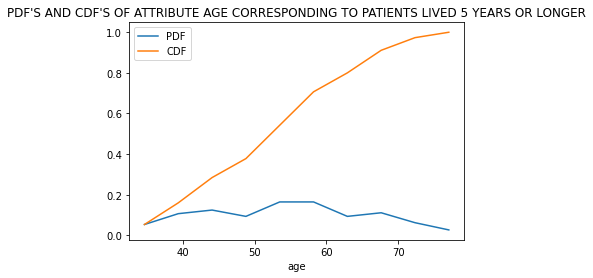

In [11]:
#PLOTTING PDF'S AND CDF'S OF ATTRIBUTE AGE CORRESPONDING TO PATIENTS LIVED LESS THAN 5 YEARS.
counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density=True)
#Compute PDF
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('age')
plt.title("PDF'S AND CDF'S OF ATTRIBUTE AGE CORRESPONDING TO PATIENTS LIVED 5 YEARS OR LONGER")
plt.legend()
plt.show();

OBSERVATION:

1) AROUND 30% OF PEOPLE HAVE SURVIVED MORE THAN 5 YEARS IN THE AGE INTERVAL OF 50 TO 60.

2) 95% OF PEOPLE HAVE SURVIVED MORE THAN 5 YEARS, IF THE AGE IS LESS THAN OR EQUAL TO 70.

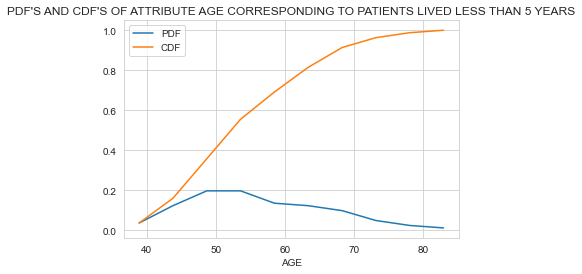

In [85]:
#PLOTTING PDF'S AND CDF'S OF ATTRIBUTE NODES CORRESPONDING TO PATIENTS LIVED LESS THAN 5 YEARS.
counts, bin_edges = np.histogram(status_2['age'], bins=10, 
                                 density=True)
#Compute PDF
pdf = counts/(sum(counts))
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('AGE')
plt.title("PDF'S AND CDF'S OF ATTRIBUTE AGE CORRESPONDING TO PATIENTS LIVED LESS THAN 5 YEARS")
plt.legend()
plt.show();

OBSERVATION:

1) AROUND 75% OF PEOPLE HAVE SURVIVED LESS THAN 5 YEARS IN THE AGE INTERVAL OF 40 TO 60.

2) 95% OF PEOPLE HAVE SURVIVED LESS THAN 5 YEARS, IF THE AGE IS LESS THAN OR EQUAL TO 70

# Bivariate Analysis

0      30
1      30
2      30
3      31
4      31
       ..
301    75
302    76
303    77
304    78
305    83
Name: age, Length: 306, dtype: int64


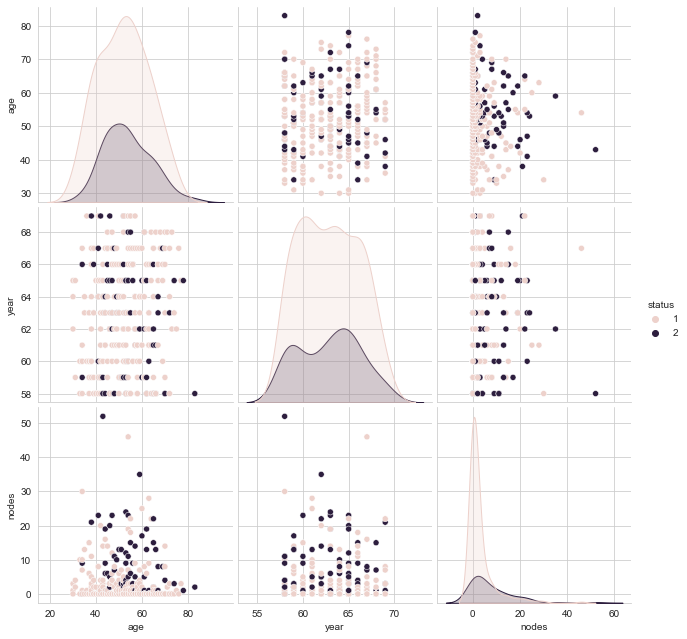

In [13]:
sns.set_style("whitegrid");
sns.pairplot(data, hue="status", height=3);
plt.show()

OBSERVATION :

1) By observing these pair plots, the pair plot of (age,nodes) can be a very usefull data,but the data is overlapped so the bivariate analysis of (age,nodes) will be done through line plot

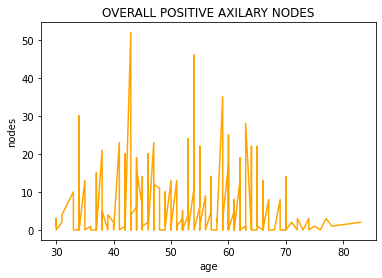

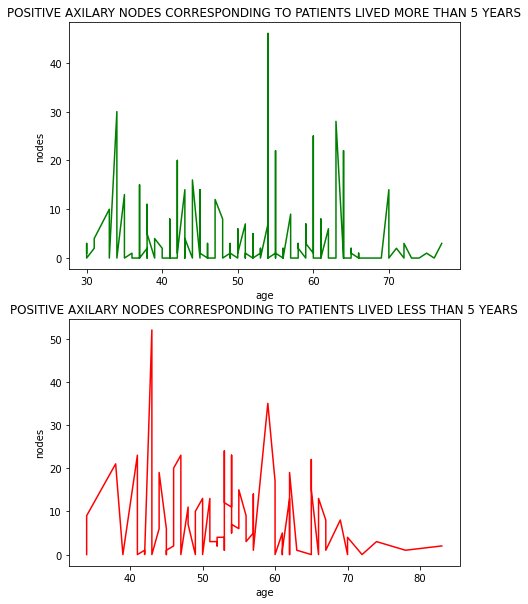

In [32]:
plt.figure(1)
plt.plot(data['age'],data['nodes'],'orange')
plt.xlabel('age')
plt.ylabel('nodes')
plt.title('OVERALL POSITIVE AXILARY NODES')
plt.figure(2,figsize=(7.0,10.0))
plt.subplot(2,1,1)
plt.plot(status_1['age'],status_1['nodes'],'g')
plt.xlabel('age')
plt.ylabel('nodes')
plt.title('POSITIVE AXILARY NODES CORRESPONDING TO PATIENTS LIVED MORE THAN 5 YEARS')
plt.subplot(2,1,2)
plt.plot(status_2['age'],status_2['nodes'],'r')
plt.xlabel('age')
plt.ylabel('nodes')
plt.title('POSITIVE AXILARY NODES CORRESPONDING TO PATIENTS LIVED LESS THAN 5 YEARS');

OBSERVATIONS:

 FROM FIGURE(1) WITH TITLE AS OVERALL POSITIVE AXILARY NODES
 
1) IN THE AGE INTERVAL OF 44 TO 54 THE NUMBER OF POSITIVE AXILARY LYMPH NODES ARE LESS THAN 25

2) IN THE AGE INTERVAL OF 70 TO 83 THE NUMBER OF POSITIVE AXILARY LYMPH NODES ARE LESS THAN 5

 FROM FIGURE(2)(A) WITH TITLE AS POSITIVE AXILARY NODES CORRESPONDING TO PATIENTS LIVED MORE THAN 5 YEARS
 
1) IN THE AGE INTERVAL OF 55 TO 65 THE NUMBER OF POSITIVE AXILARY LYMPH NODES ARE LESS THAN 30

 FROM FIGURE(2)(B) WITH TITLE AS POSITIVE AXILARY NODES CORRESPONDING TO PATIENTS LIVED LESS THAN 5 YEARS
 
1) IN THE AGE INTERVAL OF 70 TO 83 THE NUMBER OF POSITIVE AXILARY LYMPH NODES ARE LESS THAN 5

NOTE:

AGE MAY PLAY IMPORTANT ROLE IN BATTLING BREAST CANCER AS WE CAN SEE IN FIGURE(2)(B) THAT THERE ARE LESS THAN 5 POSITIVE 
AXILARY LYMPH NODES IN THE AGE INTERVAL Of 70 TO 83 BUT STILL THE PATIENT LIVED LESS THAN 5 YEARS 

LESSER THE POSITIVE AXILARY LYMPH NODES MORE LIKELY THE CHANCE TO LIVE MORE THAN 5 YEARS

MORE THE POSITIVE AXILARY LYMPH NODES MORE LIKELY THE CHANCE TO LIVE LESS THAN 5 YEARS

#  BOX PLOTS

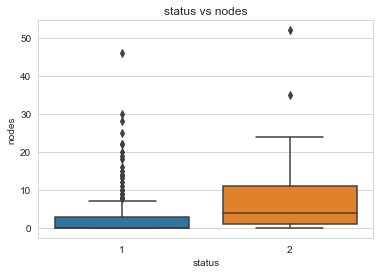

In [152]:
sns.boxplot(x=data['status'],y=data['nodes'])
plt.title('status vs nodes')
plt.show()

OBSERVATIONS:

1) IF THE POSITIVE AXILARY LYMPH NODES ARE IN THE RANGE 0 TO 8 THEN THE PATIENT IS SURVIVING MORE THAN 5 YEARS

2) IF THE POSITIVE AXILARY LYMPH NODES ARE IN THE RANGE 0 TO 24 THEN THE PATIENT IS SURVIVING LESS THAN 5 YEARS

3) WE CAN CLEARLY SEE THE OUTLIERS OF STATUS_2

# VIOLIN PLOT

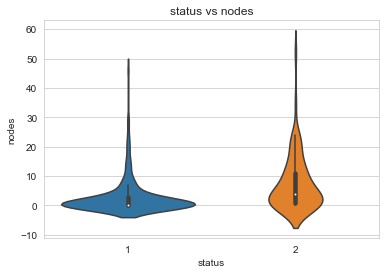

In [153]:
sns.violinplot(x=data['status'],y=data['nodes'])
plt.title('status vs nodes')
plt.show()

OBSERVATIONS:

1) FOR STATUS_1 THE MORE PATIENTS SURVIED MORE THAN 5 YEARS AS THE DENSITY OF THE PDF IS MUCH DENSER AT 0 NODES AND THE BOX PLOT RANGES FROM 0 TO 7.

2) FOR STATUS_2 THE SPREAD OF THE PDF IS MORE SO MANY PATIENTS LIVED LESS THAN 5 YEARS WITH THE NODE RANGE OF 0 TO 24